In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/fivethirtyeight-airline-safety-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fivethirtyeight-airline-safety-dataset/airline-safety.csv
/kaggle/input/fivethirtyeight-airline-safety-dataset/README.md


In [78]:
!pip install simpsom

In [79]:
import pandas as pd
import numpy as np
import simpsom as sps
from sklearn.cluster import KMeans

In [86]:
data = pd.read_csv("/kaggle/input/fivethirtyeight-airline-safety-dataset/airline-safety.csv")
x=data.drop(["airline","avail_seat_km_per_week"],axis=1)

In [90]:
net=sps.SOMNet(20,20, x.values,PBC=True)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.


In [91]:
net.train(train_algo='batch',start_learning_rate=0.01,epochs=10000)

The map will be trained with the batch algorithm.
Training SOM... done!


In [93]:
hrt = np.array((net.project(X.values)))
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 0)

/opt/conda/lib/python3.10/site-packages/simpsom/network.py:629: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([pos[0]-0.125+random.random()*0.25 for pos in bmu_list],


<Figure size 640x480 with 0 Axes>

In [96]:
y_kmeans = kmeans.fit_predict(hrt)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
y_kmeans
data['kümeler'] = y_kmeans

In [104]:
print("1 numaralı küme:")
print(data[data["kümeler"] == 0].head(5))

1 numaralı küme:
             airline  avail_seat_km_per_week  incidents_85_99  \
1          Aeroflot*              1197672318               76   
3        Aeromexico*               596871813                3   
9           Alitalia               698012498                7   
18              COPA               550491507                3   
24  Garuda Indonesia               613356665               10   

    fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
1                      14               128                6   
3                       1                64                5   
9                       2                50                4   
18                      1                47                0   
24                      3               260                4   

    fatal_accidents_00_14  fatalities_00_14  kümeler  
1                       1                88        0  
3                       0                 0        0  
9                       0                 

In [109]:
print("3 numaralı küme:")
print(data[data["kümeler"] == 2].head(5))

3 numaralı küme:
                 airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
2  Aerolineas Argentinas               385803648                6   
4             Air Canada              1865253802                2   
7       Air New Zealand*               710174817                3   
8       Alaska Airlines*               965346773                5   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
2                      0                 0                1   
4                      0                 0                2   
7                      0                 0                5   
8                      0                 0                5   

   fatal_accidents_00_14  fatalities_00_14  kümeler  
0                      0                 0        2  
2                      0                 0        2  
4                      0   

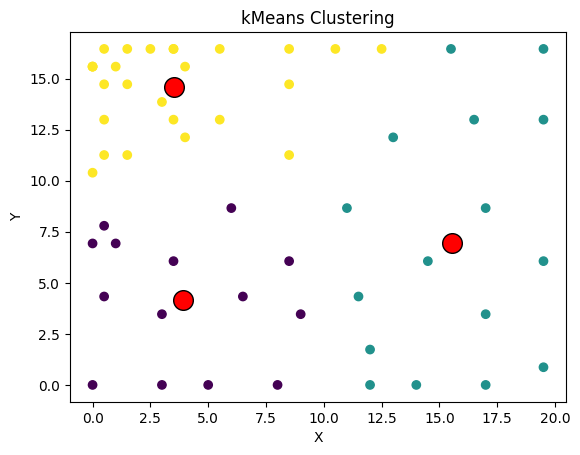

In [112]:
import matplotlib.pyplot as plt 
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(hrt[:,0],hrt[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], marker='o', s=200, c='red', edgecolor= 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("kMeans Clustering")
plt.show()